In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

In [5]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

OperationalError: (sqlite3.OperationalError) unable to open database file (Background on this error at: http://sqlalche.me/e/e3q8)

In [ ]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [ ]:
# We can view all of the classes that automap found
Base.classes.keys()

In [ ]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [21]:
# Get column names and types for reference
inspector.get_columns("measurement")
columns = inspector.get_columns("measurement")
for column in columns:  
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [22]:
# Preview table
meas_preview = engine.execute('SELECT * FROM measurement LIMIT 1')
for row in meas_preview:
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)


In [23]:
# Design a query to retrieve the last 12 months of precipitation data.
# Retrieve the most recent date in the dataset to calculate the last 12 months
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Retrieve the last 12 months of precipitation data
last_12_mo_data = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23').all()
prcp_and_date_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23').all()

In [24]:
#Load the query results into a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_and_date_data, columns=['date', 'precipitation'])
prcp_df.set_index('date', inplace=True)
prcp_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [25]:
# Sort the DataFrame Values by date
prcp_df.sort_values(by=['date'])
prcp_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


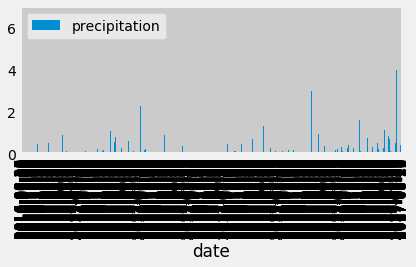

In [26]:
# Plot the results using the DataFrame plot method
prcp_df.plot.bar()
plt.tight_layout()
plt.show()

In [27]:
prcp_df.describe

<bound method NDFrame.describe of             precipitation
date                     
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
...                   ...
2017-07-24           0.84
2017-07-25           0.30
2017-07-26           0.30
2017-07-27           0.00
2017

In [28]:
# Get column names and types for reference
inspector.get_columns("Station")
columns = inspector.get_columns("Station")
for column in columns:  
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [29]:
# Design a query to calculate the total number of stations
total_stations = session.query(Station.station).count()
print(total_stations)

9


In [30]:
# Design a query to find the most active stations
most_active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())
most_active_stations.all()

# Which station has the highest number of observations?
# Answer: USC00519281

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [1]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs)
# Filter by the highest number of observations
tobs_last_12_mo = session.query(Measurement.date, Measurement.tobs).group_by(Measurement.date).filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23').all()

NameError: name 'session' is not defined